In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
# Import the dataset
world_happiness_report_path = 'Documents/WorldHapinessReportWithPython/world-happiness-report.csv'
df = pd.read_csv(world_happiness_report)
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [284]:
#Rename columns for better readability
df.columns = ['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perception', 'Positive Affect', 'Negative Affect']
df.head()

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perception,Positive Affect,Negative Affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [285]:
#Exploring missing values and datatypes of the set.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1949 non-null   object 
 1   Year                   1949 non-null   int64  
 2   Happiness Score        1949 non-null   float64
 3   GDP per Capita         1913 non-null   float64
 4   Social Support         1936 non-null   float64
 5   Life Expectancy        1894 non-null   float64
 6   Freedom                1917 non-null   float64
 7   Generosity             1860 non-null   float64
 8   Corruption Perception  1839 non-null   float64
 9   Positive Affect        1927 non-null   float64
 10  Negative Affect        1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [286]:
df.describe() 

,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perception,Positive Affect,Negative Affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [250]:
#Exploring unique country values of dataset
total_countries = df['Country'].nunique()
print(f'The number of countries in this dataset is: {number_of_countries}')

The number of countries in this dataset is: 166


In [251]:
happiness_summary = df['Happiness Score'].describe()
print(happiness_summary)

count    1949.000000
mean        5.466705
std         1.115711
min         2.375000
25%         4.640000
50%         5.386000
75%         6.283000
max         8.019000
Name: Happiness Score, dtype: float64


In [292]:
# Happiest country
max_happiness_country = df.loc[df['Happiness Score'].idxmax()]
print(max_happiness_country[['Country', 'Happiness Score']])

Country            Denmark
Happiness Score      8.019
Name: 449, dtype: object


In [253]:
# Less happy country
min_happiness_country = df.loc[df['Happiness Score'].idxmin()]
print(min_happiness_country[['Country', 'Happiness Score']])

Country            Afghanistan
Happiness Score          2.375
Name: 11, dtype: object


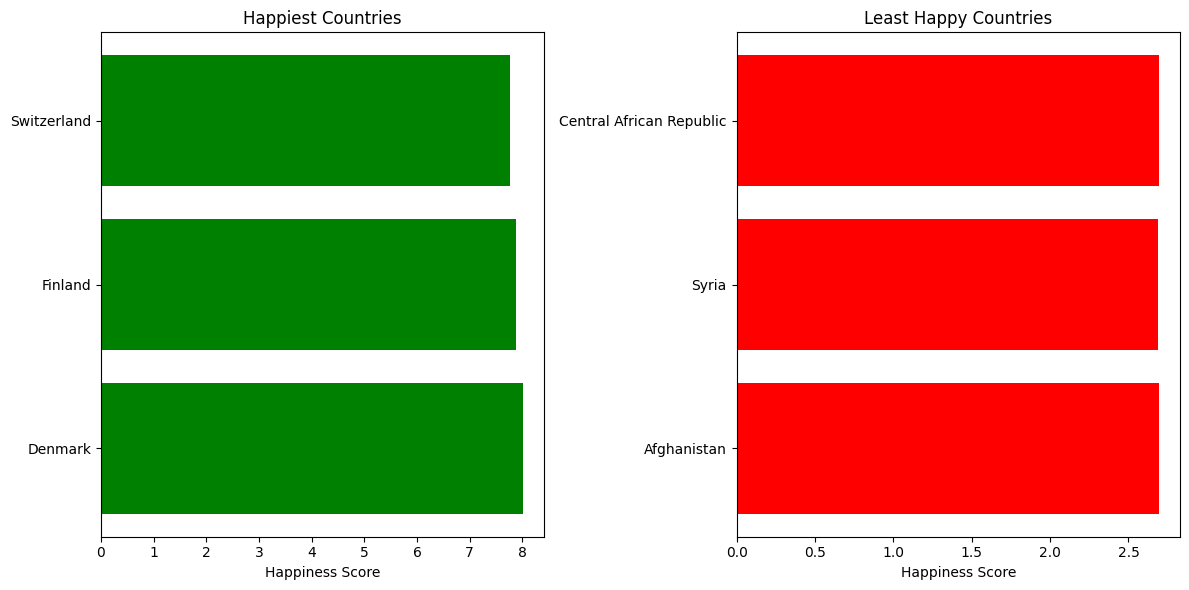

In [254]:
# Visualizing happiest and least happy countries

# Get happiest and least happy countries
top_happy_countries = df.nlargest(10, 'Happiness Score')
bottom_happy_countries = df.nsmallest(5, 'Happiness Score')

# Create bar charts to visualize the results
plt.figure(figsize=(12, 6))

# Chart for the happiest countries
plt.subplot(1, 2, 1)
plt.barh(top_happy_countries['Country'], top_happy_countries['Happiness Score'], color='green')
plt.title('Happiest Countries')
plt.xlabel('Happiness Score')

# Chart for the least happy countries
plt.subplot(1, 2, 2)
plt.barh(bottom_happy_countries['Country'], bottom_happy_countries['Happiness Score'], color='red')
plt.title('Least Happy Countries')
plt.xlabel('Happiness Score')

# Adjust the layout and display the charts
plt.tight_layout()
plt.show()

In [255]:
top5_happy_countries_2020 = df[df['Year'] == 2020].nlargest(5, 'Happiness Score')['Country']
print(f"Top 5 happiest countries in 2020:\n{top5_happy_countries_2020}")

Top 5 happiest countries in 2020:
563         Finland
731         Iceland
463         Denmark
1661    Switzerland
1224    Netherlands
Name: Country, dtype: object


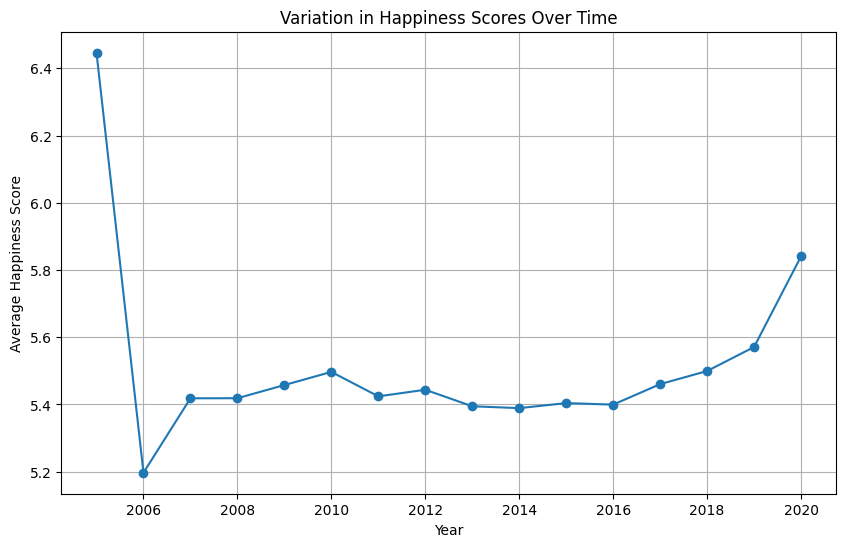

In [256]:
# Visualizing the variation in happiness scores over the years.
# Group data by year and calculate the mean happiness score for each year
average_happiness_by_year = df.groupby('Year')['Happiness Score'].mean()

# Create a line plot to visualize the variation in happiness scores over the years
plt.figure(figsize=(10, 6))
plt.plot(average_happiness_by_year.index, average_happiness_by_year.values, marker='o', linestyle='-')
plt.title('Variation in Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.show()

In [257]:
year_max_variability_of_happiness = df.groupby('Year')['Happiness Score'].std().idxmax()
print(f'The year with the highest variability in happiness score is: {year_max_variability_of_happiness}')

The year with the highest variability in happiness score is: 2013


In [258]:
# Investigating if there is a correlation between GDP per capita and happiness scores.
correlation = df['GDP per Capita'].corr(df['Happiness Score'])
print(f'A correlation value of: {correlation} indicates a strong positive correlation between GDP per Capita and Happiness Score')

A correlation value of: 0.7901660881429408 indicates a strong positive correlation between GDP per Capita and Happiness Score


In [259]:
avg_life_expectancy_by_country = df.groupby('Country')['Life Expectancy'].mean()
print(f'The average life expectancy grouped by country is: {avg_life_expectancy_by_country.round(1)}')

The average life expectancy grouped by country is: Country
Afghanistan    52.3
Albania        67.5
Algeria        65.3
Angola         53.6
Argentina      67.9
               ... 
Venezuela      66.0
Vietnam        66.9
Yemen          54.9
Zambia         51.7
Zimbabwe       50.2
Name: Life Expectancy, Length: 166, dtype: float64


In [260]:
country_highest_life_expectancy = df.groupby('Country')['Life Expectancy'].mean().idxmax()
country_lowest_life_expectancy = df.groupby('Country')['Life Expectancy'].mean().idxmin()
print(f'The country with the highest average life expectancy is: {country_highest_life_expectancy}')
print(f'The country with the lowest average life expectancy is: {country_lowest_life_expectancy}')

The country with the highest average life expectancy is: Singapore
The country with the lowest average life expectancy is: Central African Republic


In [261]:
global_mean_corruption = df['Corruption Perception'].mean()
# Explore countries where corruption perception is above global mean
countries_above_global_mean = df[df['Corruption Perception'] > global_mean_corruption]['Country'].value_counts()
print("Countries where corruption perception is above global mean:")
print(countries_above_global_mean)

Countries where corruption perception is above global mean:
Country
Kyrgyzstan      15
Moldova         15
Cameroon        15
India           15
Italy           15
                ..
Algeria          1
Gambia           1
Belgium          1
Libya            1
North Cyprus     1
Name: count, Length: 129, dtype: int64


In [293]:
most_corrupt_country = df.loc[df['Corruption Perception'].idxmax(), 'Country']
print(f"The most corrupt country is: {most_corrupt_country}")

The most corrupt country is: Hungary


In [294]:
least_corrupt_country = df.loc[df['Corruption Perception'].idxmin(), 'Country']
print(f"The least corrupt country is: {least_corrupt_country}")

The least corrupt country is: Singapore


In [295]:
least_generous_country = df.loc[df['Generosity'].idxmin(), 'Country']
print(f"The least generous country is: {least_generous_country}")

The least generous country is: Greece


In [296]:
most_generous_country = df.loc[df['Generosity'].idxmax(), 'Country']
print(f"The most generous country is: {most_generous_country}")

The most generous country is: Myanmar


In [266]:
df_sorted_by_gdp = df.sort_values(by='GDP per Capita', ascending=False)
print(df_sorted_by_gdp[['Country', 'GDP per Capita']])

         Country  GDP per Capita
1026  Luxembourg          11.648
1025  Luxembourg          11.645
1023  Luxembourg          11.640
1024  Luxembourg          11.634
1022  Luxembourg          11.617
...          ...             ...
1891   Venezuela             NaN
1892   Venezuela             NaN
1893   Venezuela             NaN
1918       Yemen             NaN
1919       Yemen             NaN

[1949 rows x 2 columns]


In [267]:
countries_missing_gdp = df['GDP per Capita'].isnull().sum()
print(f"Number of countries with missing GDP data: {countries_missing_gdp}")

Number of countries with missing GDP data: 36


In [268]:
top5_countries_gdp_variability = df.groupby('Country')['GDP per Capita'].std().nlargest(5).index.tolist()
print(f"Top 5 countries with the highest variability in GDP per Capita: {top5_countries_gdp_variability}")

Top 5 countries with the highest variability in GDP per Capita: ['China', 'Venezuela', 'Laos', 'Yemen', 'Bangladesh']


In [269]:
countries_negative_affect_greater_than_positive = df[df['Negative Affect'] > df['Positive Affect']]['Country'].value_counts()
print(f"Countries with negative affect greater than positive affect: {countries_negative_affect_greater_than_positive}")

Countries with negative affect greater than positive affect: Country
Iraq           5
Syria          3
Afghanistan    1
Lebanon        1
Togo           1
Turkey         1
Name: count, dtype: int64


In [270]:
# Exploring countries with above 75th positive affect in 2020
countries_above_75th_positive_affect_2020 = df[(df['Year'] == df['Year'].max()) & (df['Positive Affect'] > df['Positive Affect'].quantile(0.75))]
print(countries_above_75th_positive_affect_2020[['Country', 'Positive Affect']])

                       Country  Positive Affect
277                   Cambodia            0.878
341                      Chile            0.815
448             Czech Republic            0.832
463                    Denmark            0.818
527                El Salvador            0.839
541                    Estonia            0.807
731                    Iceland            0.863
944                 Kyrgyzstan            0.803
953                       Laos            0.822
1122                    Mexico            0.810
1190                   Myanmar            0.800
1238               New Zealand            0.849
1309                    Norway            0.823
1394               Philippines            0.804
1580              South Africa            0.820
1681  Taiwan Province of China            0.845
1865                   Uruguay            0.807


In [271]:
# Exploring countries with the highest negative affect in 2020
countries_highest_negative_affect_2020 = df[(df['Year'] == df['Year'].max()) & (df['Negative Affect'] > df['Negative Affect'].quantile(0.75))]
print(countries_highest_negative_affect_2020[['Country', 'Negative Affect']])

                     Country  Negative Affect
51                 Argentina            0.342
132               Bangladesh            0.332
192                  Bolivia            0.382
205   Bosnia and Herzegovina            0.325
232                   Brazil            0.389
277                 Cambodia            0.390
292                 Cameroon            0.386
341                    Chile            0.336
371                 Colombia            0.340
497                  Ecuador            0.416
512                    Egypt            0.442
527              El Salvador            0.329
649                   Greece            0.322
746                    India            0.383
773                     Iran            0.470
785                     Iraq            0.532
838              Ivory Coast            0.340
953                     Laos            0.358
1087                   Malta            0.411
1163              Montenegro            0.411
1299         North Macedonia      

In [272]:
year_max_generosity = df.groupby('Year')['Generosity'].idxmax().values[0]
print(f"The year with the highest generosity globally is: {df.loc[year_max_generosity, 'Year']}")

The year with the highest generosity globally is: 2005


In [273]:
correlation_corruption_generosity = df['Corruption Perception'].corr(df['Generosity'])
print(f"Correlation between Corruption Perception and Generosity is: {correlation_corruption_generosity} that indicates a moderate negative correlation between these two variables.")

Correlation between Corruption Perception and Generosity is: -0.29070572597445077 that indicates a moderate negative correlation between these two variables.


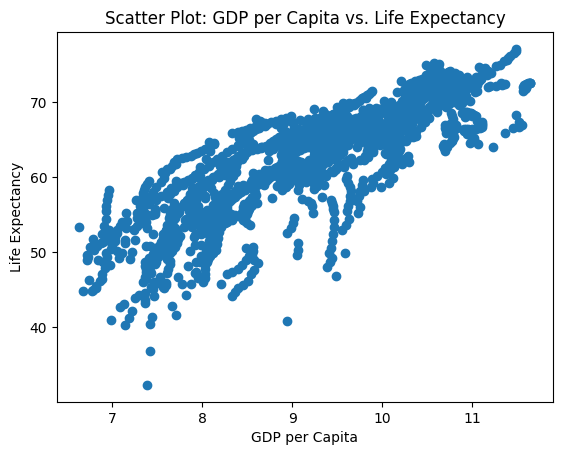

In [274]:
#  Correlation between GDP per Capita and Life Expectancy
plt.scatter(df['GDP per Capita'], df['Life Expectancy'])
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: GDP per Capita vs. Life Expectancy')
plt.show()

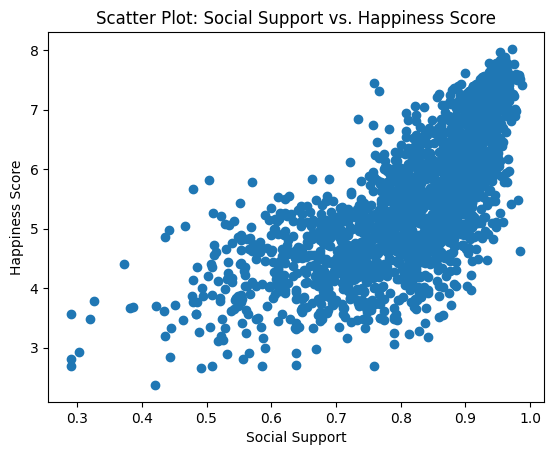

In [275]:
#Is there a visible impact of Social Support on Happiness?
plt.scatter(df['Social Support'], df['Happiness Score'])
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Social Support vs. Happiness Score')
plt.show()

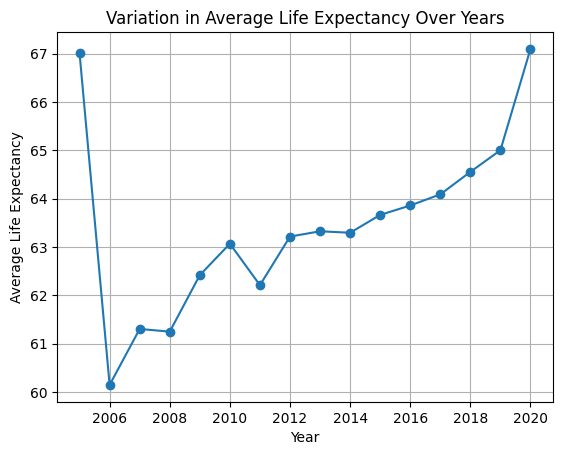

In [276]:
# How does Life Expectancy vary across different years?
# Group by Year and calculate the mean life expectancy for each year
avg_life_expectancy_by_year = df.groupby('Year')['Life Expectancy'].mean()

# Plotting the line chart
plt.plot(avg_life_expectancy_by_year, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Variation in Average Life Expectancy Over Years')
plt.grid(True)
plt.show()

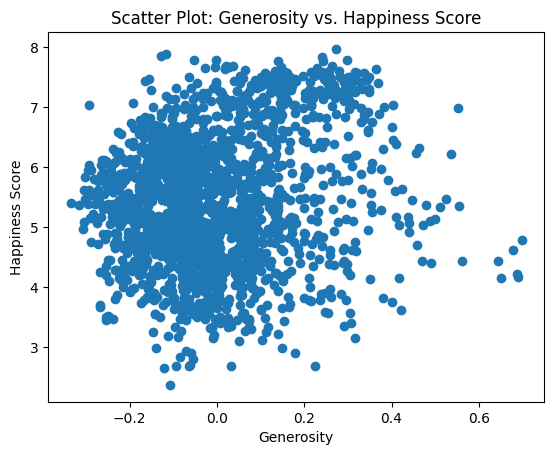

In [277]:
# Impact of Generosity on Happiness
plt.scatter(df['Generosity'], df['Happiness Score'])
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Generosity vs. Happiness Score')
plt.show()

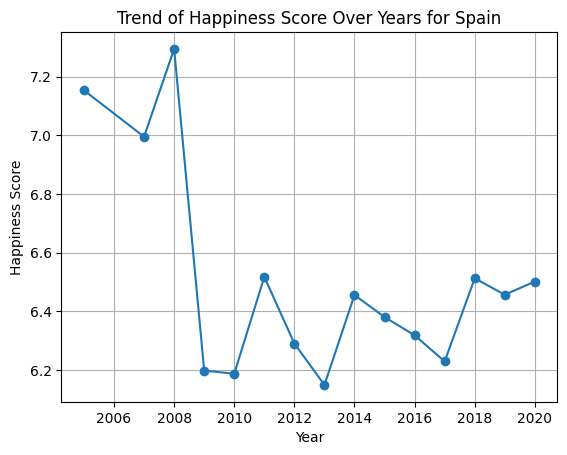

In [298]:
spain_data = df[df['Country'] == 'Spain']
plt.plot(spain_data['Year'], spain_data['Happiness Score'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Trend of Happiness Score Over Years for Spain')
plt.grid(True)
plt.show()

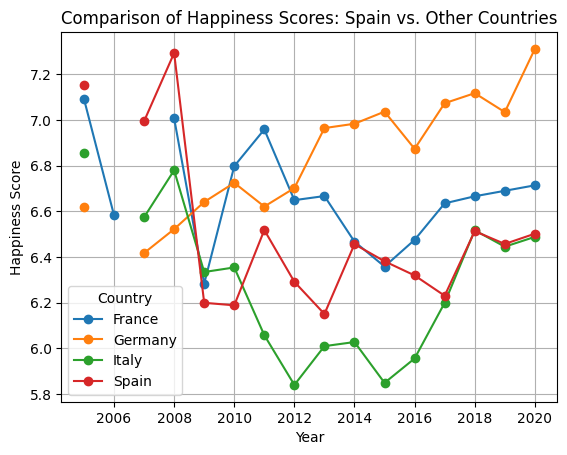

In [297]:
comparison_countries = ['Spain', 'France', 'Italy', 'Germany']  # Add more countries as needed

comparison_data = df[df['Country'].isin(comparison_countries)]
comparison_data.pivot(index='Year', columns='Country', values='Happiness Score').plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Comparison of Happiness Scores: Spain vs. Other Countries')
plt.grid(True)
plt.show()

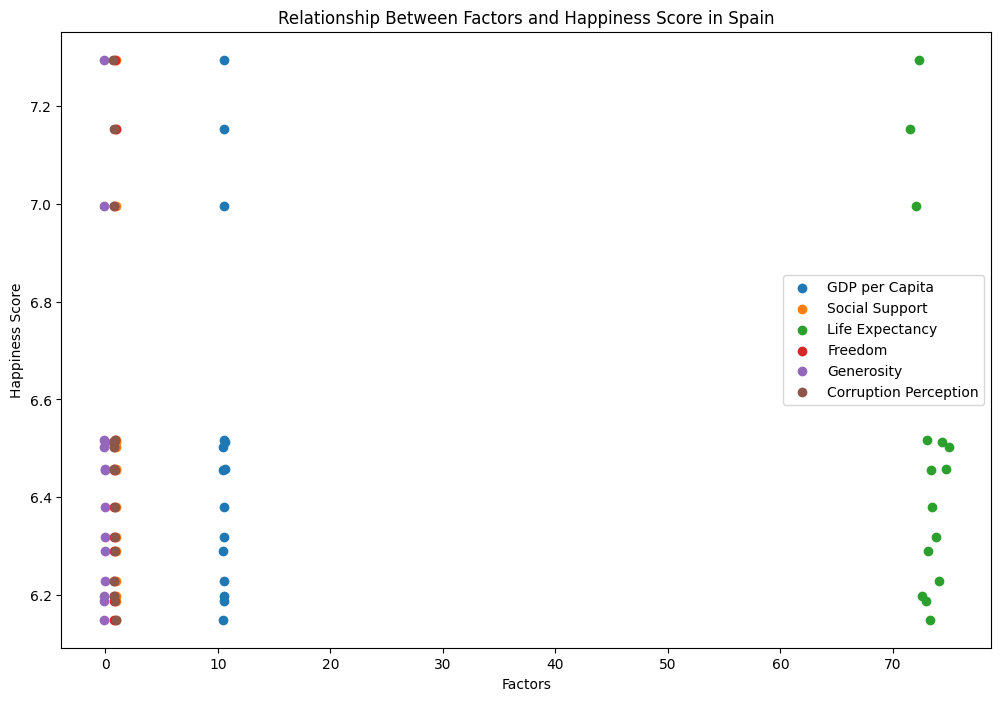

In [299]:
factors = ['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perception']

plt.figure(figsize=(12, 8))
for factor in factors:
    plt.scatter(spain_data[factor], spain_data['Happiness Score'], label=factor)

plt.xlabel('Factors')
plt.ylabel('Happiness Score')
plt.title('Relationship Between Factors and Happiness Score in Spain')
plt.legend()
plt.show()

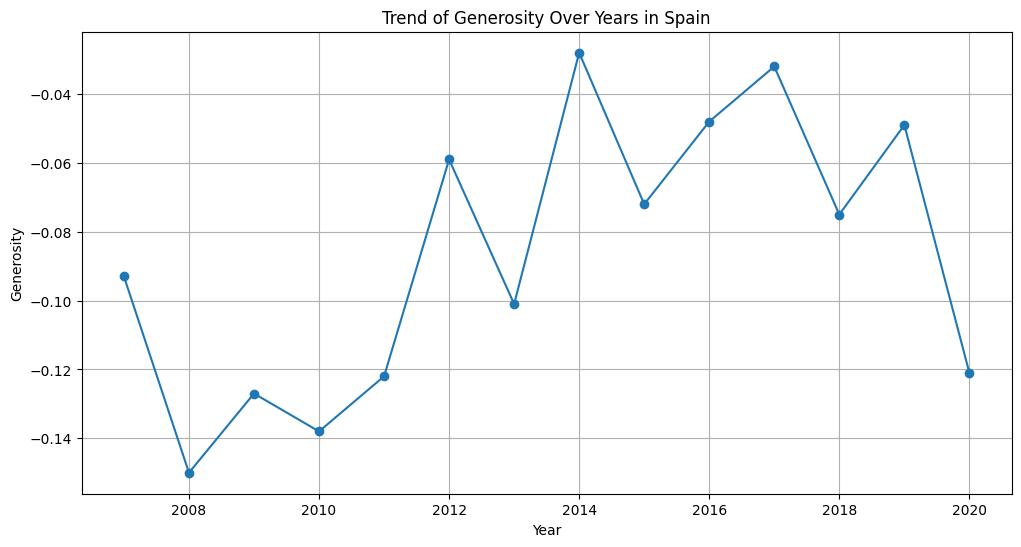

In [281]:
plt.figure(figsize=(12, 6))
plt.plot(spain_data['Year'], spain_data['Generosity'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Generosity')
plt.title('Trend of Generosity Over Years in Spain')
plt.grid(True)
plt.show()

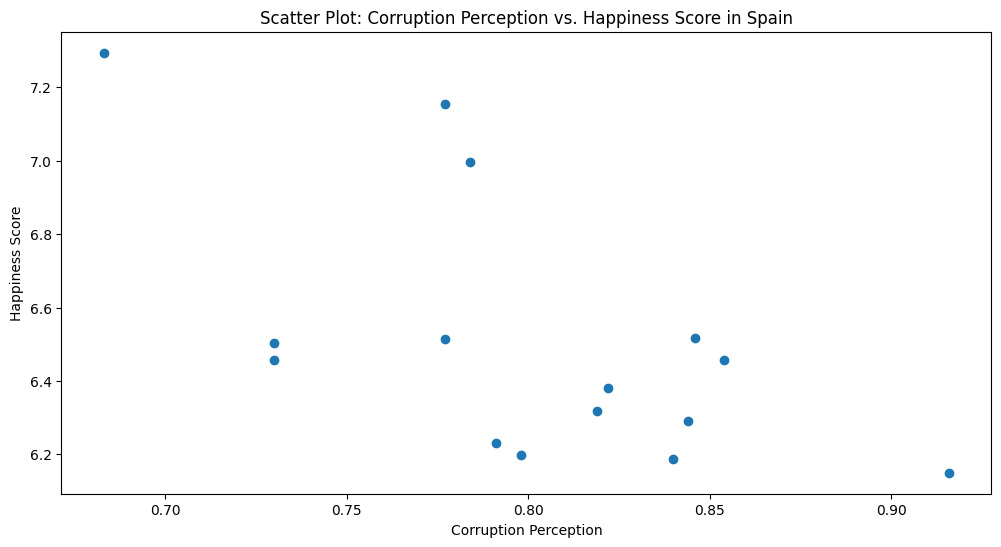

In [282]:
plt.figure(figsize=(12, 6))
plt.scatter(spain_data['Corruption Perception'], spain_data['Happiness Score'])
plt.xlabel('Corruption Perception')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Corruption Perception vs. Happiness Score in Spain')
plt.show()